In [70]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow import keras
%matplotlib inline
import os

In [71]:
test_dir=r'C:\Users\AYUSH SINGH\projects_ML\Final_Assignment_Face Mask Dataset\Test'
train_dir=r'C:\Users\AYUSH SINGH\projects_ML\Final_Assignment_Face Mask Dataset\Train'
valid_dir=r'C:\Users\AYUSH SINGH\projects_ML\Final_Assignment_Face Mask Dataset\Validation'

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [73]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [74]:
train_generator=train_datagen.flow_from_directory(


            train_dir,
            target_size=(128,128),
            batch_size=20,
            class_mode='binary')

validation_generator=test_datagen.flow_from_directory(


            valid_dir,
            target_size=(128,128),
            batch_size=20,
            class_mode='binary')


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [75]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [79]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))





In [80]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 14, 128)      

In [84]:
#compile

from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [106]:

history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=6,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/6


C:\Users\AYUSH SINGH\AppData\Local\Temp\ipykernel_32468\1099562598.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


500/500 [==============================] - 154s 309ms/step - loss: 0.0397 - acc: 0.9856 - val_loss: 0.0129 - val_acc: 0.9962
Epoch 2/6
500/500 [==============================] - 123s 247ms/step - loss: 0.0300 - acc: 0.9906 - val_loss: 0.0222 - val_acc: 0.9937
Epoch 3/6
500/500 [==============================] - 129s 258ms/step - loss: 0.0244 - acc: 0.9915 - val_loss: 0.0094 - val_acc: 0.9962
Epoch 4/6
500/500 [==============================] - 127s 254ms/step - loss: 0.0210 - acc: 0.9926 - val_loss: 0.0119 - val_acc: 0.9937
Epoch 5/6
500/500 [==============================] - 128s 255ms/step - loss: 0.0194 - acc: 0.9932 - val_loss: 0.0084 - val_acc: 0.9987
Epoch 6/6
500/500 [==============================] - 126s 253ms/step - loss: 0.0165 - acc: 0.9949 - val_loss: 0.0089 - val_acc: 0.9987


In [107]:
len(validation_generator),len(train_generator)

(40, 500)

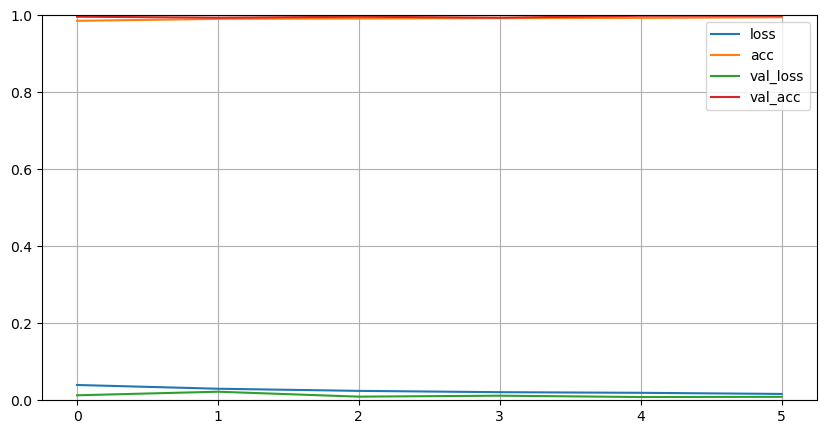

In [108]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

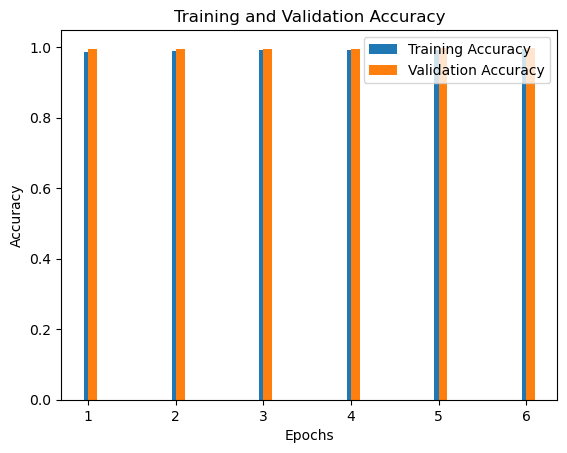

In [109]:
# Extract training and validation accuracy from the history object
train_acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(1, len(train_acc) + 1)
plt.bar(epochs, train_acc, width=0.1, align='center', label='Training Accuracy')
plt.bar(epochs, val_acc, width=0.1, align='edge', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [110]:
model.save("model_mask.h5")

C:\Users\AYUSH SINGH\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [111]:
from tensorflow.keras import backend as K
K.clear_session()
del model

In [113]:
#Vgg16 pre trained model 
train_datagen=ImageDataGenerator(
rescale=1./255, rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,shear_range=0.2,
    horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(

train_dir,
    target_size=(128,128),
    batch_size=36,
    class_mode='binary')



validation_generator=test_datagen.flow_from_directory(
                 valid_dir,
                target_size=(128,128),
                batch_size=36,
                class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [114]:
from tensorflow.keras.applications import VGG16
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(128,128,3))

In [115]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [116]:
#adding the fully connected dense and output layer with concolutional base by vgg16
from tensorflow.keras import models
from tensorflow.keras import layers

In [117]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [118]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [119]:
conv_base.trainable = False
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(1e-4), metrics=['acc'])


In [120]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_mask",save_best_only=True)

In [121]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)#

In [122]:
history= model.fit_generator(
train_generator,
steps_per_epoch=len(train_generator),
epochs=5,
validation_data=validation_generator,
validation_steps=len(validation_generator))
callbacks=[checkpoint_cb,early_stopping_cb]

C:\Users\AYUSH SINGH\AppData\Local\Temp\ipykernel_32468\2458108188.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(


Epoch 1/5
278/278 [==============================] - 550s 2s/step - loss: 0.2453 - acc: 0.9272 - val_loss: 0.0796 - val_acc: 0.9750
Epoch 2/5
278/278 [==============================] - 14219s 51s/step - loss: 0.1082 - acc: 0.9680 - val_loss: 0.0392 - val_acc: 0.9912
Epoch 3/5
278/278 [==============================] - 544s 2s/step - loss: 0.0858 - acc: 0.9722 - val_loss: 0.0304 - val_acc: 0.9925
Epoch 4/5
278/278 [==============================] - 1922s 7s/step - loss: 0.0786 - acc: 0.9739 - val_loss: 0.0282 - val_acc: 0.9925
Epoch 5/5
278/278 [==============================] - 488s 2s/step - loss: 0.0693 - acc: 0.9769 - val_loss: 0.0237 - val_acc: 0.9925


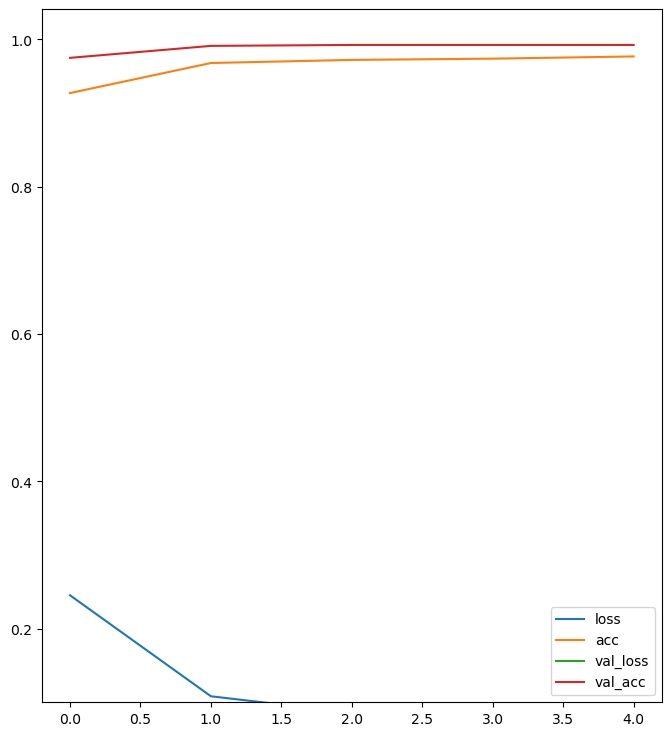

In [123]:
pd.DataFrame(history.history).plot(figsize=(8,9))
plt.gca().set_ylim(0.1)
plt.show()